# **Assignment No-5**

# **Implement the Continuous Bag of Words (CBOW) Model. Stages can be:**

**a. Data preparation**

**b. Generate training data**

**c. Train model**

**d. Output**


#**Word2vec**

Word2vec is a group of related models that are used to produce word embeddings. These models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located close to one another in the space.

#**CBOW**

CBOW or Continous bag of words is to use embeddings in order to train a neural network where the context is represented by multiple words for a given target words.

For example, we could use “cat” and “tree” as context words for “climbed” as the target word.

# **Continuous Bag of Words (CBOW):**

**To implement Word2Vec, there are two flavors which are — Continuous Bag-Of-Words (CBOW) and continuous Skip-gram (SG).**

It attempts to guess the output (target word) from its neighboring words (context words). You can think of it like fill in the blank task, where you need to guess word in place of blank by observing nearby words.

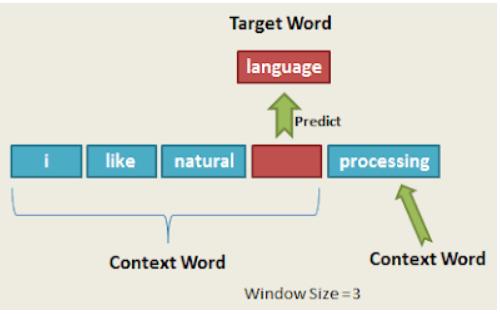

**The CBOW architecture is pretty simple contains :**

**- the word embeddings as inputs (idx)**

**- the linear model as the hidden layer**

**- the log_softmax as the output**

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt

#**Dataset**

In [ ]:
sentences = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""

#**Clean Data**

In [ ]:
# remove special characters
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)

# remove 1 letter words
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()

# lower all characters
sentences = sentences.lower()

In [ ]:
sentences

'we are about to study the idea of computational process computational processes are abstract beings that inhabit computers as they evolve processes manipulate other abstract things called data the evolution of process is directed by pattern of rules called program people create programs to direct processes in effect we conjure the spirits of the computer with our spells'

#**Vocabulary**

In [ ]:
words = sentences.split()
vocab = set(words)

In [ ]:
words

['we',
 'are',
 'about',
 'to',
 'study',
 'the',
 'idea',
 'of',
 'computational',
 'process',
 'computational',
 'processes',
 'are',
 'abstract',
 'beings',
 'that',
 'inhabit',
 'computers',
 'as',
 'they',
 'evolve',
 'processes',
 'manipulate',
 'other',
 'abstract',
 'things',
 'called',
 'data',
 'the',
 'evolution',
 'of',
 'process',
 'is',
 'directed',
 'by',
 'pattern',
 'of',
 'rules',
 'called',
 'program',
 'people',
 'create',
 'programs',
 'to',
 'direct',
 'processes',
 'in',
 'effect',
 'we',
 'conjure',
 'the',
 'spirits',
 'of',
 'the',
 'computer',
 'with',
 'our',
 'spells']

In [ ]:
vocab

{'about',
 'abstract',
 'are',
 'as',
 'beings',
 'by',
 'called',
 'computational',
 'computer',
 'computers',
 'conjure',
 'create',
 'data',
 'direct',
 'directed',
 'effect',
 'evolution',
 'evolve',
 'idea',
 'in',
 'inhabit',
 'is',
 'manipulate',
 'of',
 'other',
 'our',
 'pattern',
 'people',
 'process',
 'processes',
 'program',
 'programs',
 'rules',
 'spells',
 'spirits',
 'study',
 'that',
 'the',
 'they',
 'things',
 'to',
 'we',
 'with'}

In [ ]:
vocab_size = len(vocab)
embed_dim = 10
context_size = 2

In [ ]:
vocab_size

43

#**Implementation**

In [ ]:
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

#**Data bags**

In [ ]:
# data - [(context), target]

data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])

[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'computational'], 'idea')]


# **Embeddings**

In [ ]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))

In [ ]:
embeddings

array([[0.85400023, 0.43143121, 0.3116587 , 0.74640232, 0.18849331,
        0.57271093, 0.65300936, 0.69827846, 0.44846298, 0.43472336],
       [0.2846478 , 0.08468005, 0.92743784, 0.27302318, 0.82573039,
        0.86533541, 0.95157735, 0.75604108, 0.94620317, 0.81350987],
       [0.4654931 , 0.78517263, 0.77352969, 0.70113016, 0.62533706,
        0.83327385, 0.17366235, 0.86834776, 0.16750906, 0.91679075],
       [0.48161254, 0.49357051, 0.81151807, 0.03564567, 0.75684482,
        0.69353189, 0.84241263, 0.41314322, 0.89793073, 0.3947825 ],
       [0.68170391, 0.31602784, 0.67155103, 0.25041164, 0.88091526,
        0.54674493, 0.27838917, 0.29991923, 0.35483661, 0.40509511],
       [0.43741002, 0.25246636, 0.89368314, 0.487729  , 0.00635055,
        0.59278993, 0.79689231, 0.5243941 , 0.53044843, 0.4075482 ],
       [0.87588319, 0.31553445, 0.95364307, 0.57522911, 0.50085   ,
        0.97513555, 0.67298413, 0.99676688, 0.44933456, 0.37711943],
       [0.26707145, 0.73402441, 0.8710397

In [ ]:
embeddings.shape

(43, 10)

# **Linear Model**

In [ ]:
def linear(m, theta):
    w = theta
    return m.dot(w)

# **Log softmax + NLLloss = Cross Entropy**

In [ ]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())

In [ ]:
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [ ]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1

    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)

    return (- out + softmax) / logits.shape[0]

# **Forward function**

In [ ]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)

    return m, n, o

# **Backward function**

In [ ]:
def backward(preds, theta, target_idxs):
    m, n, o = preds

    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)

    return dw

# **Optimize function**

In [ ]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

## **Training**

In [ ]:
theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))

In [ ]:
theta

array([[-0.53239241,  1.40147963, -0.04736087, ...,  0.10601456,
         1.06133753, -0.11412514],
       [ 0.01376235, -0.07238062, -0.38739555, ..., -0.06451703,
        -0.85457781,  0.07985991],
       [-0.65951863,  0.01076374,  0.69371603, ...,  1.19116085,
         0.40145547,  0.15531727],
       ...,
       [-0.88690824, -0.96964198, -0.04250746, ..., -0.43362985,
        -0.89959363,  0.59726661],
       [-0.15794884, -0.11544805, -1.44825546, ...,  0.36296354,
         0.04742617, -0.38593514],
       [ 1.18569654,  0.78352503, -0.87002765, ..., -1.11629198,
        -0.61350363, -0.01832856]])

In [ ]:
theta.shape

(40, 43)

In [ ]:
epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)


    epoch_losses[epoch] = losses

In [ ]:
losses

[0.4598534366068373,
 0.2990204403468825,
 0.37039900866741454,
 0.39343400097975817,
 0.2792096354818455,
 0.2701322331437585,
 0.44332249060710116,
 0.45286640767257264,
 0.4369520830135961,
 0.2445063539248278,
 0.4261671385693497,
 0.8388160844647771,
 0.5112483795307653,
 0.35006559254069913,
 0.6303364263538147,
 0.4140210795241415,
 0.36930352543353423,
 0.40159329071207955,
 0.5616291073441985,
 0.25394840115290185,
 0.3669519343967579,
 0.3158591967334317,
 0.37643222702914453,
 0.727807446434691,
 0.4165023306788429,
 0.5486283732019911,
 0.5477091295694339,
 0.843048164530998,
 0.733383575360611,
 0.6314459501382055,
 0.5466893418423171,
 0.3446657994697131,
 0.40765161144749207,
 0.46861044171826,
 0.36689560203840077,
 0.9846094990397338,
 0.5387692232256063,
 0.5360926985833159,
 0.6894353270855873,
 0.6150626013267961,
 0.3859184221289606,
 0.3982788578363239,
 0.6835271729104672,
 0.17520915743526086,
 0.567717237240162,
 0.364792721667854,
 0.3042631595219238,
 0.65958

# **Analyze**

**Plot loss/epoch**

Text(0, 0.5, 'Losses')

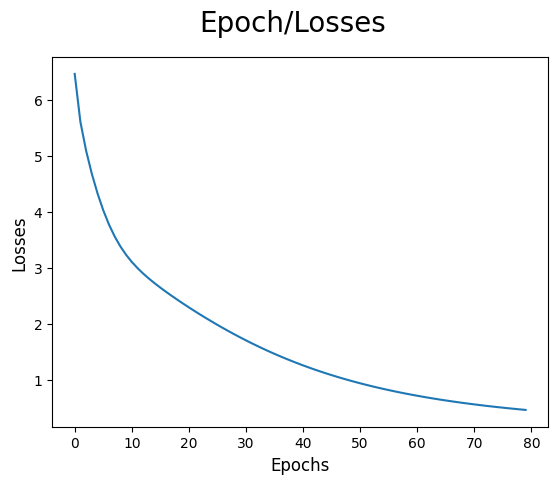

In [ ]:
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

# **Predict function**

In [ ]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]

    return word

In [ ]:
# (['we', 'are', 'to', 'study'], 'about')
predict(['we', 'are', 'to', 'study'])

'about'

# **Accuracy**

In [ ]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1

    return (1 - (wrong / len(data)))

In [ ]:
accuracy()

1.0